# Simple Linear Regression Algorithm (from scratch)

The purpose of this module is to create a simple (two dimensional) linear regression algorithm from scratch. We will first use a numerical method (gradient descent) to minimize our cost function. Then we will find an exact solution by setting the gradient of the cost function to zero.

The complete description of the theory and method for the algorithm can be found in the pdf document titled "Linear Regression."

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

## Data Set
Let's create a simple data set of roughly linear data in two dimensions. We will use this set to practice our algorithm with.

In [2]:
x=list(range(6))
y=[1,3,7,13,21,22]

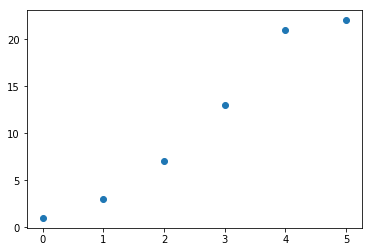

In [3]:
plt.figure()
plt.scatter(x,y)

In [4]:
#Line of best fit via scipy
scipy.stats.linregress(x,y)

LinregressResult(slope=4.7142857142857144, intercept=-0.6190476190476204, rvalue=0.9801595866926569, pvalue=0.00058655799031968534, stderr=0.47666642880922783)

# Manual Linear Regression (Numerical Method)
Given values for intercept and slope (omega not and omega one, respectively), we will use an iterative process to determine new values of these parameters. The process works as follows: given initial values of the parameters, the next set of parameters will be the sum of the old and eta times the negative of the gradient of the residual sum of squares (the quantity we are trying to minimize), where eta is a pre determined step size. 

Our initial guess for the slope and intercept can be made my finding the equation of the line between the first and last data point. The iteration will stop when the gradient is smaller than a specified value (epsilon).

In [5]:
#Define functions that compute the partial derivatives of the residual sum of squares (evaluated at the given points)
def omega_not_prime(yseries,xseries,omega_not,omega_one):
    part_sum=yseries-(omega_not+(omega_one*xseries))
    return part_sum.sum()

def omega_one_prime(yseries,xseries,omega_not,omega_one):
    part_sum=xseries*(yseries-(omega_not+(omega_one*xseries)))
    return part_sum.sum()

In [6]:
xs=pd.Series(x)
ys=pd.Series(y)

In [55]:
#The regressor function will take x values, y values, epsilon, eta, and maxitter as inputs. The x and y values must be pandas
#series. Epsilon is a positive number and is the convergence criteria. Eta is the iteration step size. maxitter is a positive
#integer specifying the maximum number of iterations to perform in the case of non convergence.
def regressor(yseries,xseries,epsilon,eta,maxitter):
    #Calculate initial slope as the slope between the first and last points
    omega_one=(yseries[len(yseries)-1]-yseries[0])/(xseries[len(xseries)-1]-xseries[0])
    #Calculate initial intercept using the slople calculated above and the first data point
    omega_not=yseries[0]-(omega_one*xseries[0])
    
    
    i=0
    while True:
        i+=1
        o_not_p=omega_not_prime(yseries,xseries,omega_not,omega_one)
        o_one_p=omega_one_prime(yseries,xseries,omega_not,omega_one)
        omega_not=omega_not+(2*eta*o_not_p)
        omega_one=omega_one+(2*eta*o_one_p)
        if abs(o_not_p)<epsilon and abs(o_one_p)<epsilon:
            break
        if i>maxitter:
            break
    rss=((yseries-(omega_one*xseries+omega_not))**2).sum()
    print("\n\nomega_not: {}\nomega_one: {}\niterations: {}\nomega_not prime: {}\nomega_one prime: {}\nrss: {}".format(omega_not,omega_one,
                                                                                                  i,o_not_p,o_one_p,rss))
    
        

In [56]:
regressor(ys,xs,0.00001,.01,1000)



omega_not: -0.619042299085834
omega_one: 4.714284215062019
iterations: 350
omega_not prime: -9.778114995029341e-06
omega_one prime: 2.7555802804002383e-06
rss: 15.904761904816064


# Manual Linear Regression (Setting Gradient of RSS to Zero)

In [61]:
#Setting the gradient of the rss to zero and solving for omega_one and omega_not, we arrive at the following functions
def omega_one_calculator(xseries,yseries):
    numerator=(xseries*yseries).sum()-(yseries.sum()*xseries.sum()/len(xseries))
    denominator=(xseries*xseries).sum()-((xseries.sum()**2))/len(xseries)
    return numerator/denominator

def omega_not_calculator(xseries,yseries):
    return (yseries.sum()/len(xseries))-(omega_one_calculator(xseries,yseries)*xseries.sum()/len(xseries))

In [63]:
#Calculate the parameters for the series xs and ys
print("omega_one: {}\nomega_not: {}".format(omega_one_calculator(xs,ys),omega_not_calculator(xs,ys)))

omega_one: 4.714285714285714
omega_not: -0.6190476190476204
